##  **Fase 2:**
**Visualización**

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

In [45]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [49]:
df = pd.read_csv('Flights.csv')
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152,0,0.0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,August,Unknown,Unknown
1,100102,2017,January,10,4,14,2030,203,0,0.0,Ontario,Toronto,M1R 4K3,Male,College,79371.73,Single,Nova,2887.74,Standard,2013,March,Unknown,Unknown
2,100140,2017,January,6,0,6,1200,120,0,0.0,British Columbia,Dawson Creek,U5I 4F1,Female,College,79371.73,Divorced,Nova,2838.07,Standard,2016,July,Unknown,Unknown
3,100214,2017,January,0,0,0,0,0,0,0.0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,August,Unknown,Unknown
4,100272,2017,January,0,0,0,0,0,0,0.0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,January,Unknown,Unknown


1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

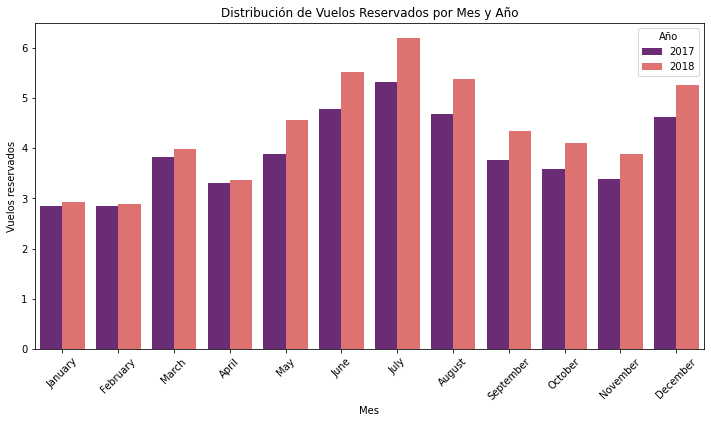

In [48]:

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='flights_booked', ci=None, hue='year', palette='magma', order=order)
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de Vuelos Reservados por Mes y Año')
plt.legend(title='Año')
plt.xticks(rotation=45)  
plt.show()


La distribución tanto del 2017 como del 2018 parece muy homogénea.
Vemos que la mayoría de reservas tanto del año 2017 como del 2018 se concentra en los meses de verano (Junio, Julio y Agosto).
También vemos que en ambos años los meses de Marzo se mantiene alto ( intuyo que coincide con vacaciones de Semana Santa). Y, finalmente, diciembre también tiene valores altos, ya que coincide con vacaciones de Navidad.  

2.  ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

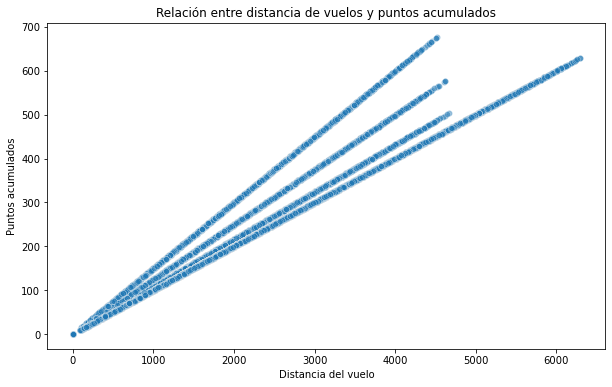

In [50]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='points_accumulated', alpha=0.5)

# Agregar etiquetas y título
plt.xlabel('Distancia del vuelo')
plt.ylabel('Puntos acumulados')
plt.title('Relación entre distancia de vuelos y puntos acumulados')

# Mostrar el gráfico
plt.show()


Vemos que existe una relación directamente proporcional: a más distancia, más puntos acumulados.

Entiendo que se tratará de una técnica de fidelización que premia a quién más viaja.

3.  ¿Cuál es la distribución de los clientes por provincia o estado?

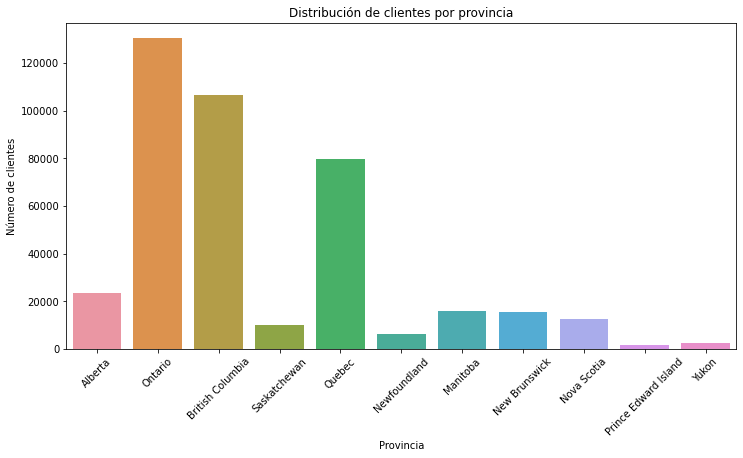

In [51]:
# Dado que tenemos que comparar una variable categórica con otra numérica , me parece correcto utilizar un countplot
# Crear el gráfico de conteo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='province')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por provincia')

# Mostrar el gráfico
plt.show()


El mayor número de clientes se concentra en las tres provincias más grandes de Canadá: Ontario, Bristish Columbia y Quebec.
Por lo tanto, tiene sentido.

4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [54]:
# Para comparar el salario promedio tendremos que agrupar por niveles educativos
df_educacion= df.groupby('education')['salary'].mean().reset_index()
df_educacion

,education,salary
0,Bachelor,72599.080913
1,College,79371.730000
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


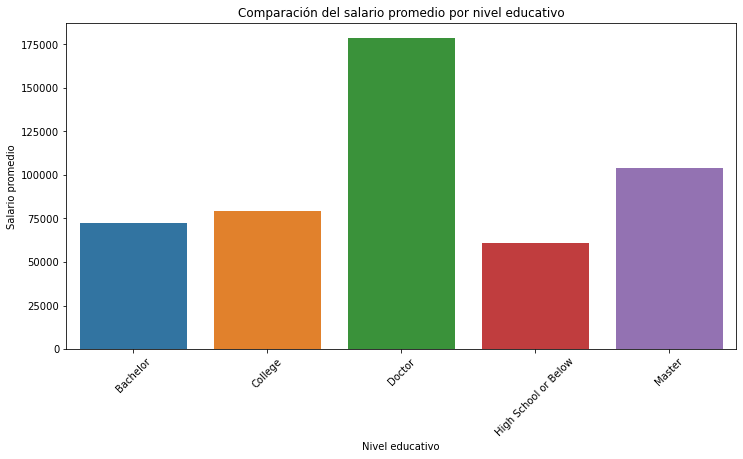

In [55]:
# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_educacion, x='education', y='salary')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Agregar etiquetas y título
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.title('Comparación del salario promedio por nivel educativo')

# Mostrar el gráfico
plt.show()

Vemos que a mayor nivel educativo mayor es el sueldo siendo el doctorado el que percibe mayores salarios con gran diferencia.

5.  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [56]:
df['loyalty_card'].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [59]:
df['loyalty_card'].value_counts()

Star      183745
Nova      136883
Aurora     83132
Name: loyalty_card, dtype: int64

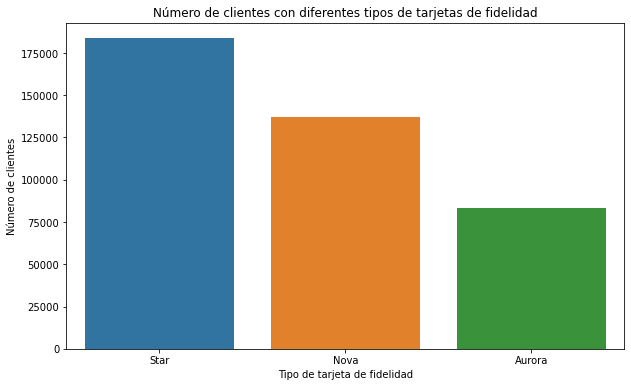

In [58]:
# Con el gráfico de barras podemos ver el número absoluto de clientes para cada tipo de tarjeta.
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loyalty_card', order=df['loyalty_card'].value_counts().index)
plt.xlabel('Tipo de tarjeta de fidelidad')
plt.ylabel('Número de clientes')
plt.title('Número de clientes con diferentes tipos de tarjetas de fidelidad')

# Mostrar el gráfico
plt.show()


La tarjeta más popular entre los clientes es la 'Star'.

6.  ¿Cómo se distribuyen los clientes según su estado civil y género?

In [61]:
df_estado= df.groupby('marital_status')['loyalty_number'].count().reset_index()
df_estado

,marital_status,loyalty_number
0,Divorced,60762
1,Married,234845
2,Single,108153


In [62]:
df_genero = df.groupby('gender')['loyalty_number'].count().reset_index()
df_genero

,gender,loyalty_number
0,Female,202757
1,Male,201003


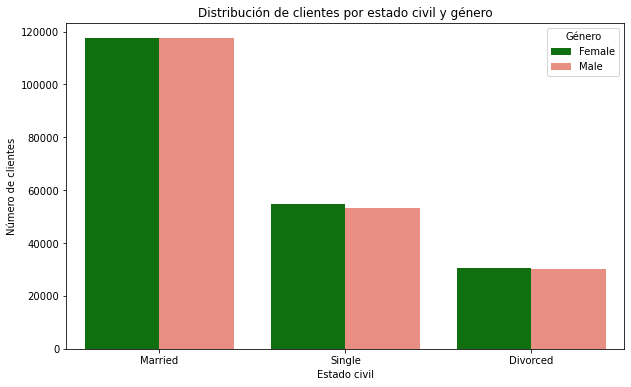

In [63]:
# Definir una paleta de colores personalizada
custom_palette = {'Male': 'salmon', 'Female': 'green'}

# Crear el gráfico de barras apiladas con la paleta personalizada
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital_status', hue='gender', palette=custom_palette)
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por estado civil y género')
plt.legend(title='Género')

# Mostrar el gráfico
plt.show()


No existe apenas ninguna diferencia entre hombre y mujeres.
Pero sí existen diferencias según su estado civil. La mayoría de clientes están casados.